# Customer Satisfaction Report


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample customer satisfaction data for the task

In [7]:
# Generate sample customer satisfaction data for the task
 
np.random.seed(1)
customers = ['Customer A', 'Customer B', 'Customer C', 'Customer D', 'Customer E']
responses = np.random.choice(['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied'], size=50)
 
survey_data = pd.DataFrame({
    'Customer': np.random.choice(customers, size=50),
    'Response': responses
})

# 1. Calculate and visualize the distribution of customer responses using a bar chart.

In [8]:
# Calculate distribution.
response_counts = survey_data['Response'].value_counts()

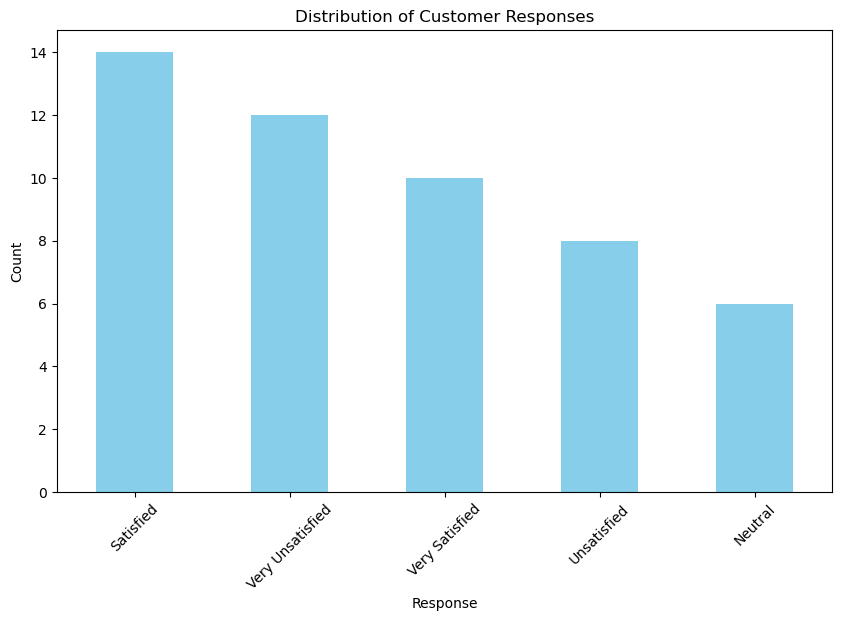

In [10]:
# Bar Chart Visualization.
plt.figure(figsize=(10, 6))
response_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Display a summary table with the count and percentage of each response category.

In [12]:
# Get response counts and percentages
response_summary = (
    survey_data['Response'].value_counts(normalize=True)
    .reset_index(name='Percentage')
    .rename(columns={'index': 'Response'})
    .assign(Count=lambda x: x['Percentage'] * len(survey_data))
)
 
# Display table
print("Customer Satisfaction Summary")
print(response_summary.to_string(index=True))

Customer Satisfaction Summary
           Response  Percentage  Count
0         Satisfied        0.28   14.0
1  Very Unsatisfied        0.24   12.0
2    Very Satisfied        0.20   10.0
3       Unsatisfied        0.16    8.0
4           Neutral        0.12    6.0


# 3. Implement a radar chart to compare satisfaction levels across different customer segments.

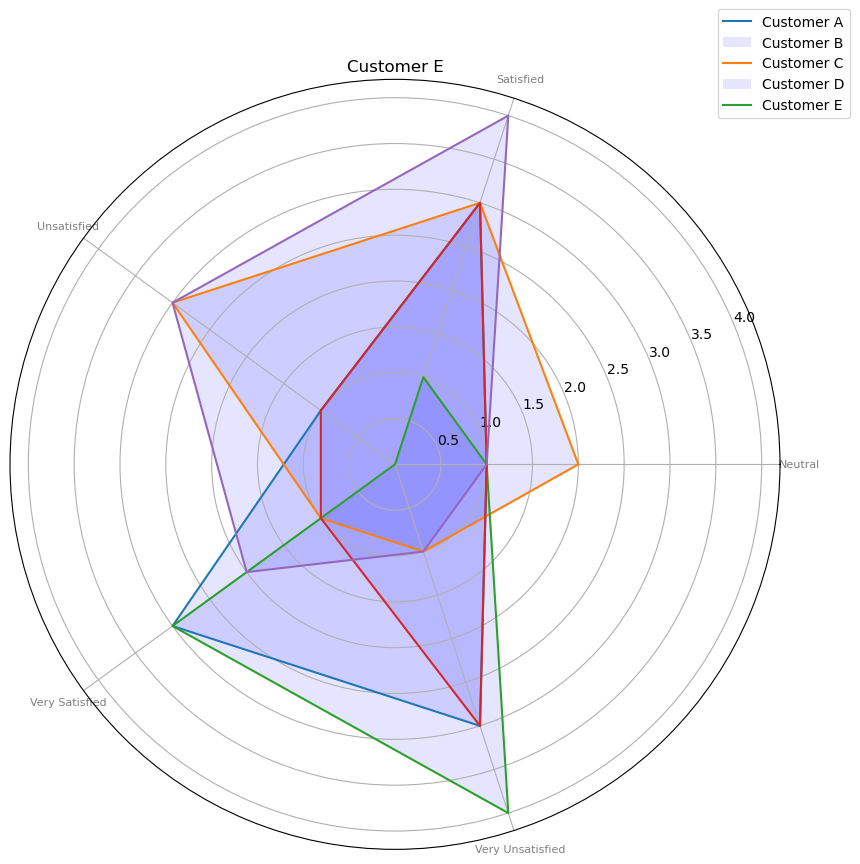

In [13]:
from math import pi

# Aggregate data for radar chart
radar_data = survey_data.groupby('Customer')['Response'].value_counts().unstack().fillna(0)

# Define function to create radar chart
def radar_chart(df, title):
    categories=list(df)
    N = len(categories)
    values=df.values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values)
    ax.fill(angles, values, 'blue', alpha=0.1)
    ax.set_title(title)

# Plot radar chart
plt.figure(figsize=(10, 10))
for customer in radar_data.index:
    radar_chart(radar_data.loc[[customer]], customer)
plt.legend(radar_data.index, loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

# 4. Create a word cloud based on customer feedback comments.

In [21]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 487.6 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00


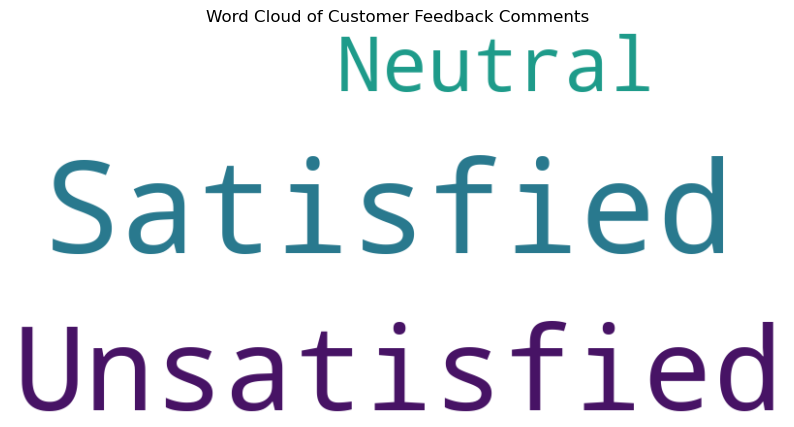

In [15]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(survey_data['Response']))

# Display the generated word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Customer Feedback Comments')
plt.axis('off')
plt.show()

# 5. Include interactive filters to explore responses based on customer segments.

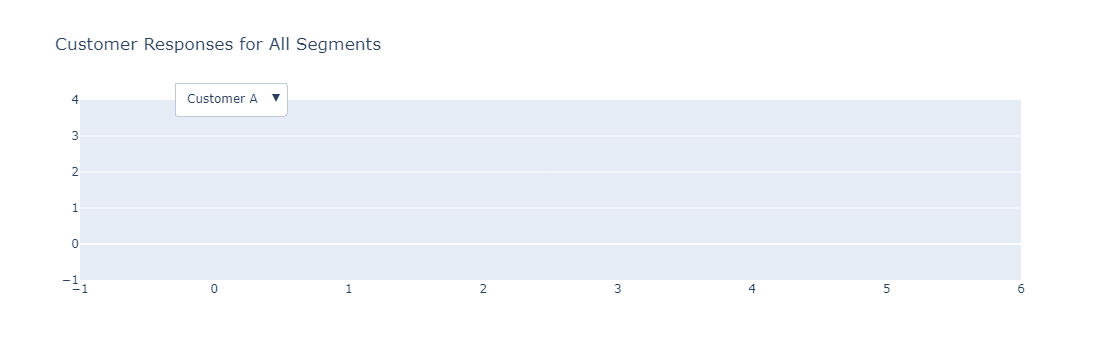

In [17]:
import plotly.graph_objects as go

# Create dropdown options
dropdown_options = []
for customer in customers:
    dropdown_options.append({'label': customer, 'method': 'update', 'args': [{'visible': survey_data['Customer'] == customer}, {'title': f'Customer Responses for {customer}'}]})
dropdown_options.append({'label': 'All', 'method': 'update', 'args': [{'visible': True}, {'title': 'Customer Responses for All Segments'}]})

# Create traces for each customer segment
traces = []
for customer in customers:
    trace = go.Bar(
        x=survey_data[survey_data['Customer'] == customer]['Response'].value_counts().index,
        y=survey_data[survey_data['Customer'] == customer]['Response'].value_counts().values,
        name=customer,
        visible=False
    )
    traces.append(trace)

# Initialize figure
fig = go.Figure(data=traces)

# Update layout with dropdown menu
fig.update_layout(
    updatemenus=[
        {'buttons': dropdown_options,
         'direction': 'down',
         'showactive': True,
         'x': 0.1,
         'xanchor': 'left',
         'y': 1.1,
         'yanchor': 'top'}
    ],
    title='Customer Responses for All Segments'
)

# Show plot
fig.show()
